#  Photoelectric Factor Prediction Using Machine Learning Algorithms

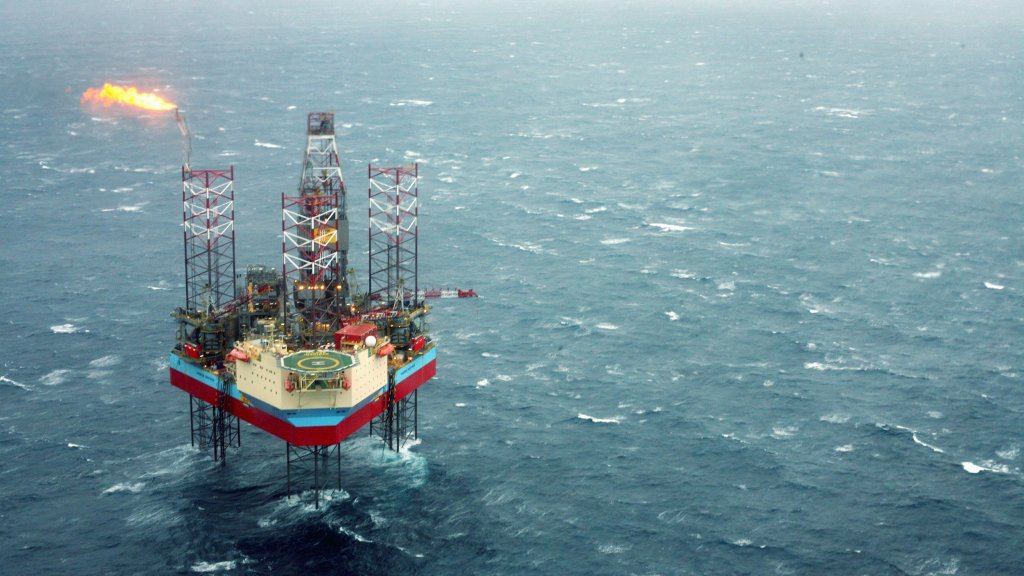

# Importing Libraries

In [ ]:
# import required packages and libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import seaborn as sns
import glob
import lasio
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
# import sklearn libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import  MultiTaskElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Reading Datasets

In [ ]:
all_files = glob.glob(os.getcwd() + "/*.las")

li = []

for filename in all_files:
    w1 = lasio.read(filename)
    w1 = w1.df() 
    w1['Well']=filename[-12:-4]
    li.append(w1)

frame = pd.concat(li, axis=0, ignore_index=False)
frame.head(5)

# Pre processing

## Correcting Well's names

In [ ]:
frame['Well'] = frame['Well'].replace(r'[\\/j]', '', regex=True)

In [ ]:
frame['Well'] .unique()

In [ ]:
frame.shape

## Selections of Wells

In [ ]:
Model_Building=frame[(frame['Well']!='34_10-35') & (frame['Well']!='34_11-1')]

In [ ]:
Model_Building['Well'] .unique()

In [ ]:
BLIND_TEST=frame[frame['Well']=='34_10-35']
PREDICTION=frame[frame['Well']=='34_11-1']

In [ ]:
BLIND_TEST.shape

In [ ]:
PREDICTION.shape

In [ ]:
BLIND_TEST.isnull().sum()

In [ ]:
PREDICTION.isnull().sum()

In [ ]:
Model_Building.isnull().sum()

## Selection of Features that are not Null throughout

In [ ]:
BLIND_TEST=BLIND_TEST[['CALI','RHOB','GR','DTC','RDEP','SP','RMED','PEF']]
Model_Building=Model_Building[['CALI','RHOB','GR','DTC','RDEP','SP','RMED','PEF']]
PREDICTION=PREDICTION[['CALI','RHOB','GR','DTC','RDEP','SP','RMED']]

## Drop the Null Rows in Remaining data

In [ ]:
BLIND_TEST=BLIND_TEST.dropna()
Model_Building=Model_Building.dropna()
PREDICTION=PREDICTION.dropna()

# Checking Shape

In [ ]:
data=Model_Building
#%%
# A summary of the new DataFrame (data) created
print("The number of rows of the new DataFrame is: {}".format(data.shape[0]))
print("The number of columns of the new DataFrame is: {}".format(data.shape[1]))
print("The number of Logs in the new DataFrame is: {}".format(data.shape[1] -4))
#%% Data Wrangling
# Removes the 'datasetName' column

In [ ]:
data.shape

In [ ]:
df1=data

In [ ]:
df=data
df.isnull().sum()

In [ ]:
df1.shape

In [ ]:
BLIND_TEST.shape

In [ ]:
PREDICTION.shape

In [ ]:
df.columns

## Assigning Accurate Names

In [ ]:
df.columns=['Caliper log',' density of the borehole and the rocks log'
            ,'Gamma ray log',
           'transit time of compressional wave ( compression)',
           'deep resistivity','spontaneous potential','medium resistivity','Photoelectric Factor']

# Visulizing the spread

In [ ]:
i=0
while i<len(df.columns):
    plt.hist(df[df.columns[i]], bins=15, color='g', edgecolor='k')
    plt.xlabel(str(df.columns[i]), fontsize=12)
    plt.ylabel('Frequency')
    plt.show()
    i=i+1

In [ ]:
w1=df.drop(["Photoelectric Factor"],axis=1)

# Checking the Similarity

In [ ]:
i=0
while i<len(w1.columns):
    print('Similarity between '+str(w1.columns[i])+' and Photoelectric Factor', cosine_similarity(w1[w1.columns[i]].values.reshape(1,-1), df['Photoelectric Factor'].values.reshape(1,-1)))
    i=i+1

In [ ]:
# call the triple combo log function as defined
def triple_combo_log1(data,top_depth,bottom_depth):
    
    df1=data[(data.index >= top_depth) & (data.index <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15), sharey=True)
    fig.suptitle("Triple-combo Log display data", fontsize=16)
    fig.subplots_adjust(top=0.85,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
# 'Caliper log', ' density of the borehole and the rocks log',
#       'Photoelectric Factor', 'Gamma ray log',
#       'transit time of compressional wave ( compression)', 'deep resistivity',
#       'spontaneous potential', 'medium resistivity'
        ax1 = ax[0].twiny()
        ax1.set_xlim(0,16)
        ax1.spines['top'].set_position(('outward',0))
        ax1.plot(df1['Photoelectric Factor'], df1.index, '-b', label= "PEF")
        ax1.set_xlabel('Photoelectric Factor(b/e-)',color='b')    
        ax1.tick_params(axis='x', colors='b')
        ax1.grid(True)
        
        ax2 = ax[0].twiny()
        ax2.set_xlim(0, 16)
        ax2.spines['top'].set_position(('outward', 40))
        ax2.plot(df1['Caliper log'], df1.index, '--k', label= "CALI (cm)")
        ax2.set_xlabel('Caliper log(cm)', color ='k')
        ax2.tick_params(axis='x', colors='k')
        

# Second track resitivity plot
        ax11 = ax[1].twiny()
        ax11.set_xlim(0.1, 1000)
        ax11.set_xscale('log')
        ax11.grid(True)
        ax11.spines['top'].set_position(('outward', 0))
        ax11.plot(df1[' density of the borehole and the rocks log'], df1.index, '-r', label="DRHO (g/cm3)")
        ax11.set_xlabel('density of the borehole and the rocks log(g/cm3)', color = 'r')
        ax11.tick_params(axis='x', colors='r')
        
         
        ax12 = ax[1].twiny()
        ax12.set_xlim(0.1, 1000)
        ax12.set_xscale('log')
        ax12.spines['top'].set_position(('outward', 40))
        ax12.plot(df1['transit time of compressional wave ( compression)'], df1.index, '-m', label= "DTC (us/ft)")
        ax12.set_xlabel('transit time of compressional wave ( compression)(us/ft)', color= 'm')
        ax12.tick_params(axis='x', colors='m')
         
# Third track NPHI, RHO, DT display
        ax21 = ax[2].twiny()
        ax21.grid(True)
        ax21.set_xlim(140,40)
        ax21.spines['top'].set_position(('outward', 0))
        ax21.plot(df1['Gamma ray log'], df1.index, '-b', label= "DTE (API)")
        ax21.set_xlabel('Gamma ray log(API)', color= 'b')
        ax21.tick_params(axis='x', colors= 'b')

        #'CALI', 'DRHO', 'NPHI', 'RHOB', 'PEF', 'GR', 'DTC',
      # 'DTE', 'RDEP', 'SP', 'RSHA', 'RXO', ''
        ax22 = ax[2].twiny()
        #ax22.grid(True)
        ax22.set_xlim(440,100)
        ax22.spines['top'].set_position(('outward', 40))
        ax22.plot(df1['spontaneous potential'], df1.index, '-r', label= "RMED (mV)")
        ax22.set_xlabel('spontaneous potential(mV)', color= 'r')
        ax22.tick_params(axis='x', colors= 'r')        
         
        ax23 = ax[3].twiny()
        ax23.grid(True)
        ax23.set_xlim(0, .6)
        ax23.invert_xaxis()
        ax23.spines['top'].set_position(('outward', 0))
        ax23.plot(df1['medium resistivity'], df1.index, '--k', label = "medium resistivity(Ωm)")
        ax23.set_xlabel('medium resistivity(Ωm)', color = 'k')
        ax23.tick_params(axis= 'x', colors='k')
         
        ax24 = ax[3].twiny()
        ax24.set_xlim(1.5, 3.0)
        ax24.spines['top'].set_position(('outward', 40))
        ax24.plot(df1['deep resistivity'], df1.index, '-r', label= "deep resistivity(Ωm)")
        ax24.set_xlabel('deep resistivity(Ωm)', color = 'r')
        ax24.tick_params(axis='x', colors= 'r')
        plt.show()

# Combine effect of logs on PEF

In [ ]:
triple_combo_log1(df1,df1.index.min(), df1.index.max())

## Renaming Columns and Shapes

In [ ]:
BLIND_TEST.columns=df1.columns

In [ ]:
BLIND_TEST.isnull().sum()

In [ ]:
BLIND_TEST.shape

In [ ]:
PREDICTION.shape

In [ ]:
PREDICTION.columns=[ 'Caliper log', 
       ' density of the borehole and the rocks log',
        'Gamma ray log',
       'transit time of compressional wave ( compression)',
        'deep resistivity',
       'spontaneous potential', 'medium resistivity']

In [ ]:
X=df1[[ 'Caliper log', 
       ' density of the borehole and the rocks log',
        'Gamma ray log',
       'transit time of compressional wave ( compression)',
        'deep resistivity',
       'spontaneous potential', 'medium resistivity']]

In [ ]:
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10);# save heatmap as .png file
plt.show()

In [ ]:
Y=df1['Photoelectric Factor']

# Standarization before Reduction of data

In [ ]:
print("*"*50)
print("Data Distribuation")
print("*"*50)
print("*"*50)
print("Data Distribuation of all Numeric Columns")
print("*"*50)
box_df = X
plt.figure(figsize=(15,6))  

ax = sns.boxplot(data=box_df, orient="h", palette="Set2")
plt.xlabel('Data Points')
plt.ylabel('DataLables')
plt.title('Box Plot to see the Data Distribution')
plt.savefig('Box Plot to see the Data Distribution.png')
plt.show()

In [ ]:
features = X
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [ ]:
print("*"*50)
print("Data Distribuation")
print("*"*50)
print("*"*50)
print("Data Distribuation of all Numeric Columns")
print("*"*50)
box_df = features
plt.figure(figsize=(15,6))  

ax = sns.boxplot(data=box_df, orient="h", palette="Set2")
plt.xlabel('Data Points')
plt.ylabel('DataLables')
plt.title('Box Plot to see the Data Distribution')
plt.savefig('Box Plot to see the Data Distribution.png')
plt.show()

In [ ]:
moods_features=pd.DataFrame(features)

# PCA to reduce data size

In [ ]:

storenumber=list()
storeexpl=list()
i=1
while i<7:
    n_components = i
    storenumber.append(i)
    print(n_components)
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(moods_features)

    total_var = pca.explained_variance_ratio_.sum() * 100
    storeexpl.append(total_var)

    labels = {str(i): f"PC {i+1}" for i in range(n_components)}
    labels['color'] = 'Label'

    fig = px.scatter_matrix(
        components,
        dimensions=range(n_components),
        labels=labels,
        title=f'Total Explained Variance: {total_var:.2f}%',
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()
    i=i+1

In [ ]:
i=1
storenumber=list()
storeexpl=list()
while i<7:
    n_components = i
    storenumber.append(i)
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(moods_features)

    total_var = pca.explained_variance_ratio_.sum() * 100
    storeexpl.append(total_var)

    i=i+1

In [ ]:
plt.figure(figsize=(15,6))  
plt.plot(storenumber,storeexpl)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Total Explained Variance for Principal Components')
plt.show()

In [ ]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(moods_features)

In [ ]:
plt.bar(height=pca.explained_variance_ratio_*100,x=[1,2,3,4,5])
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained Variance")
plt.title("Percentage of Explained Variance per Principal Component")
plt.show()

# K Means Clustering 

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principal_components)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_components)
df1['Clusters']=kmeans.labels_
df1.head(1)

In [ ]:
plt.scatter(principal_components[:,0], principal_components[:,1], c=df1['Clusters'], cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component and spread of clusters")
plt.show()

In [ ]:
x = df1['Caliper log']
y = df1['Photoelectric Factor']
z = df1['Clusters']
gridsize = 30 
plt.hexbin(x, y, C=z)   
cb = plt.colorbar()
cb.set_label('Clusters')
plt.gcf().set_size_inches(15, 12)
plt.xlabel("Caliper log")
plt.ylabel("Photoelectric Factor")
plt.title("Clusters based on Photoelectric Factor and Caliper log")
plt.show() 

In [ ]:
Cluster0=df1[df1['Clusters']==0]
triple_combo_log1(Cluster0,Cluster0.index.min(), Cluster0.index.max())

In [ ]:
Cluster1=df1[df1['Clusters']==1]
triple_combo_log1(Cluster1,Cluster1.index.min(), Cluster1.index.max())

In [ ]:
Cluster2=df1[df1['Clusters']==2]
triple_combo_log1(Cluster2,Cluster2.index.min(), Cluster2.index.max())

## Machine Learning Algortihms (Blind Test Modeling)

In [ ]:
X_train = Cluster0.drop(['Photoelectric Factor','Clusters'],axis=1)
y_train = pd.DataFrame(Cluster0['Photoelectric Factor'])
X_test=BLIND_TEST.drop(['Photoelectric Factor'],axis=1)
y_test=pd.DataFrame(BLIND_TEST['Photoelectric Factor'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
#l = len(X.columns.values)
#l = l - 1
#X = FinalDataFrame.iloc[:,0:l]
#y = FinalDataFrame.Synthsis
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
score = []
score = fs.scores_
selected_feature = []
i = 0
while i<len(score):
    if score[i] >5:
        selected_feature.append(i)
    i = i+1
print("These Feature Has been Selected: ",selected_feature)
print()
print("Getting indexes the Actual Data Columns:")
print()
i = 0
while i<len(X.columns):
    print("Index: ",i," ",X.columns[i])
    i = i+1

In [ ]:
Toplot=pd.DataFrame(X.columns)
#Toplot=Toplot[Toplot[0]!="DEATH_EVENT"]
Toplot=Toplot.reset_index(drop=True)
Toplot['score']=score
Toplot=Toplot.sort_values("score",ascending=False)
Toplot=Toplot.reset_index(drop=True)
Toplot.columns=['Columns','Score']
Toplot['Importance']=Toplot.index+1

In [ ]:
import altair as alt# Importing Libraries

alt.Chart(Toplot).mark_bar().encode(
    x='sum(Score):Q',
    y=alt.Y('Columns', sort='x')
).properties(
    title='Scores of each columns '
)

In [ ]:
X_train = Cluster0[[' density of the borehole and the rocks log','transit time of compressional wave ( compression)','deep resistivity']]
X_test=BLIND_TEST[[' density of the borehole and the rocks log','transit time of compressional wave ( compression)','deep resistivity']]

y_train = pd.DataFrame(Cluster0['Photoelectric Factor'])
y_test=pd.DataFrame(BLIND_TEST['Photoelectric Factor'])

In [ ]:
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.array(y_test), label='True Future')
    plt.plot(np.array(prediction),label='Prediction')
    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Sample')
    plt.ylabel('Photoelectric Factor')
    plt.show()

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae=mean_absolute_error(predictions , actual)

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

In [ ]:
reg=MLPRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor MLP Regression', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor MLP Regression')

In [ ]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor Random Forest Regressor', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor Random Forest Regressor')

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor Linear Regression', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor Linear Regression')

In [ ]:
reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor Gradient Boosting Regressor', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor Gradient Boosting Regressor')

In [ ]:
reg=KNeighborsRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor K Neighbors Regressor', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor K Neighbors Regressor')

In [ ]:
reg=OrthogonalMatchingPursuit()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor Orthogonal Matching Pursuit', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor Orthogonal Matching Pursuit')

In [ ]:
reg=SGDRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor SGD Regressor', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor SGD Regressor')

In [ ]:
reg=MultiTaskElasticNet()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor Multi Task Elastic Net', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor Multi Task Elastic Net')

In [ ]:
reg=SVR()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor SVR', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor SVR')

In [ ]:
reg=LassoLars()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor LassoLars', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor LassoLars')

In [ ]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(list(pre), 'Cluster 0 Photoelectric Factor Decision Tree Regressor', list(y_test['Photoelectric Factor'].values))

In [ ]:
evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster 0 Photoelectric Factor Decision Tree Regressor')

# The above analysis shows that MLP Regression, Multi Task Elastic Net, Orthognal Matching Pursuit and Linear Regression has performed best in all cases so we will choose these 2 for future work

In [ ]:
i=1
while i<3:
    print("\n Working for Cluster ", i)
    Cluster=df1[df1['Clusters']==i]
    X_train = Cluster[[' density of the borehole and the rocks log','transit time of compressional wave ( compression)','deep resistivity']]
    y_train = pd.DataFrame(Cluster['Photoelectric Factor'])
    reg=MLPRegressor()
    reg.fit(X_train,y_train)
    pre=reg.predict(X_test)
    plot_future(list(pre), 'Cluster '+str(i)+' Photoelectric Factor MLP Regression', list(y_test['Photoelectric Factor'].values))
    evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster '+str(i)+' Photoelectric Factor MLP Regression')
    reg=MultiTaskElasticNet()
    reg.fit(X_train,y_train)
    pre=reg.predict(X_test)
    plot_future(list(pre), 'Cluster '+str(i)+' Photoelectric Factor MultiTaskElasticNet', list(y_test['Photoelectric Factor'].values))
    evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster '+str(i)+' Photoelectric Factor  MultiTaskElasticNet')
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    pre=reg.predict(X_test)
    plot_future(list(pre), 'Cluster '+str(i)+' Photoelectric Factor Linear Regression', list(y_test['Photoelectric Factor'].values))
    evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster '+str(i)+' Photoelectric Factor Linear Regression')
    reg=OrthogonalMatchingPursuit()
    reg.fit(X_train,y_train)
    pre=reg.predict(X_test)
    plot_future(list(pre), 'Cluster '+str(i)+' Photoelectric Factor OrthogonalMatchingPursuit', list(y_test['Photoelectric Factor'].values))
    evaluate_prediction(pre, list(y_test['Photoelectric Factor'].values), 'Cluster '+str(i)+' Photoelectric Factor OrthogonalMatchingPursuit')
    i=i+1

## Final Feature and Algorithm Selection

In [ ]:
# define simple feature sets
A = [' density of the borehole and the rocks log','transit time of compressional wave ( compression)','deep resistivity']      
B = [' density of the borehole and the rocks log','transit time of compressional wave ( compression)'] 
C = ['transit time of compressional wave ( compression)','deep resistivity'] 

D = [' density of the borehole and the rocks log','deep resistivity']       


feature_sets = {
    'RHOB+DTC+RDEP': A, 'RHOB+DTC': B, 'DTC+RDEP': C,
    'RHOB+RDEP': D
}

In [ ]:
# define regressors
regressors = {
    'MultiTaskElasticNet':MultiTaskElasticNet(),
    'LinearRegression': LinearRegression(),
    'OrthogonalMatchingPursuit':OrthogonalMatchingPursuit()
}

In [ ]:
from sklearn.metrics import mean_absolute_error

# evaluation of all regressors on all feature sets
# (the goal is to forecast the water level in KOMAROM)
res = []
for re_name in regressors:
    for fs_name in feature_sets:
        print(re_name, fs_name)
        X_train = df1[feature_sets[fs_name]] # matrix of input characteristics
        y_train = df1[['Photoelectric Factor']]  # target feature vector
        x_te=X_test[feature_sets[fs_name]]
        re = regressors[re_name]
        re.fit(X_train,y_train)
        yhat = re.predict(x_te)                      
        mae = mean_absolute_error(y_test, yhat) # validation
        
        res.append({
            'algorithm': re_name,
            'feature set': fs_name,
            'MAE': mae
        })

In [ ]:
dataset=pd.DataFrame(res)

In [ ]:
Ok=dataset.sort_values("MAE").reset_index(drop=True)

In [ ]:
Ok

In [ ]:
import plotly.express as px
fig = px.bar(Ok,text='MAE', x='MAE', y='feature set', color="algorithm",title="Mean Absolute Error for feature sets selction")
fig.show()

# Final Work for Predictions

In [ ]:
X_train = df1[['transit time of compressional wave ( compression)','deep resistivity']]
y_train = df1['Photoelectric Factor'].values   # target feature vector
X_test=PREDICTION[['transit time of compressional wave ( compression)','deep resistivity']]
reg = LinearRegression()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)

In [ ]:
pre

In [ ]:
PREDICTION['Predicted PEF']=pre

In [ ]:
plt.figure(figsize=(15,6))  
plt.xlabel("DEPT")
plt.ylabel("Predicted Photo Electric Factor")
plt.title("Predicted Photo Electric Factor b/e- (Final Prediction)")
PREDICTION['Predicted PEF'].plot()
plt.show()